<a href="https://colab.research.google.com/github/brianhumphreys/Moire-Detector/blob/main/After_open_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Playground

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Jul 18 16:25:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


## Test 2D Wavelet Decomposition function
This function(fwdHaarDWT2D) computes the 2D Wavelet Transform in the image. All the input images are passed through a Haar Wavelet Decomposition module, to get the LL, LH, HL and HHH component of the image.

In [3]:
from google.colab import drive                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# !ls /content/drive/MyDrive/Moire/train/negative/001/

In [ ]:
# !ls /content/drive/MyDrive/Moire/trainDataNegative
# !ls /content/drive/MyDrive/Moire/train/negative/001
# !mv -v /content/drive/MyDrive/Moire/trainDataNegative/ '/content/drive/MyDrive/Moire/train/negative/001'
# !ls '/content/drive/MyDrive/Moire/train/negative/001/trainDataNegative'
# !mv -v '/content/drive/MyDrive/Moire/train/negative/001/trainDataNegative/*.tiff' '/content/drive/MyDrive/Moire/train/negative/001'
# import os

# fromDir = '/content/drive/MyDrive/Moire/notNormalizedPositiveImages/'
# toDir = "/content/drive/MyDrive/Moire/unnormalized/positive/002/"

# # !ls /content/drive/MyDrive/Moire/testDataNegative/

# for filename in os.listdir(fromDir):
#   os.rename(fromDir + filename, toDir + filename)

In [ ]:
# import os
# os.chdir("/content/drive/")
# !ls

# os.chdir("../..")
# !ls


In [2]:
!ls /content/drive/MyDrive/Moire
!pip install pyheif whatimage
# !pip show wand

checkPoint  intermediate  preaugmented	test  train  unnormalized
     |████████████████████████████████| 8.2 MB 6.7 MB/s 


In [ ]:
# !ls /content/drive/MyDrive/Moire/notNormalizedPositiveImages/
# !ls /content/drive/MyDrive/Moire/notNormalizedNegativeImages/
# !uname -m

## Normalized Raw data to 1000x750 pixel images
Images are cropped to fit a 3:4 aspect ratio and then resized to match a 1000x750 size. Moves photos **unnormalized** -> **preaugmented**


In [51]:
# importing the module


import os
from os import listdir
from os.path import isfile, join
import numpy as np
import io

import whatimage
import pyheif
from PIL import Image


def decodeImageMetadata(bytesIo):

  with open(bytesIo, 'rb') as f:
    data = f.read()
    fmt = whatimage.identify_image(data)
    print(fmt)
    if fmt in ['heic', 'avif']:
      i = pyheif.read_heif(bytesIo)

      # Extract metadata etc
      print(i.metadata)
      for metadata in i.metadata or []:
        if metadata['type']=='Exif':
          print('exif:')
        print(metadata)
        
      # Convert to other file format like jpeg
      s = io.BytesIO()
      pi = Image.frombytes(mode=i.mode, size=i.size, data=i.data)

      pi.save(s, format="jpeg")

def decodeImage(bytesIo):
  with open(bytesIo, 'rb') as f:
    data = f.read()
    fmt = whatimage.identify_image(data)
    if fmt in ['heic', 'avif']:
      i = pyheif.read_heif(data)
      pi = Image.frombytes(mode=i.mode, size=i.size, data=i.data)
      pi.save("heic.jpg", format="jpeg")

def read_heic(path: str):
    img = Wimage(path)
    img.format = 'jpg'
    img.save(filename="heic.jpg")
    img.close()

def openImage(fileName):
  # decodeImageMetadata(fileName)
  decodeImage(fileName)
  return Image.open("heic.jpg")

def cropAndSave(image, fileName):
    width = image.size[0]
    height = image.size[1]

    aspect = width / float(height)

    if (height > width):
        image = image.rotate(90, Image.NEAREST, expand=1)
        width = image.size[0]
        height = image.size[1]

    ideal_width = 1000
    ideal_height = 750

    ideal_aspect = ideal_width / float(ideal_height)

    if aspect > ideal_aspect:
        # Then crop the left and right edges:
        new_width = int(ideal_aspect * height)
        offset = (width - new_width) / 2
        resize = (offset, 0, width - offset, height)
    else:
        # ... crop the top and bottom:
        new_height = int(width / ideal_aspect)
        offset = (height - new_height) / 2
        resize = (0, offset, width, height - offset)

    thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
    thumb.save(fileName)



def normalizeRawImages(superpoch, dataSetNumber):

  print('##### NORMALIZING - superpoch: ' + superpoch + ' - dataset: ' + dataSetNumber)

  negativeFromDir = '/content/drive/MyDrive/Moire/unnormalized/negative/' + dataSetNumber + '/'
  positiveFromDir = '/content/drive/MyDrive/Moire/unnormalized/positive/' + dataSetNumber + '/'
  negativeToDir = '/content/drive/MyDrive/Moire/preaugmented/negative/' + dataSetNumber + '/'
  positiveToDir = '/content/drive/MyDrive/Moire/preaugmented/positive/' + dataSetNumber + '/'

  if not os.path.exists(positiveToDir):
      os.makedirs(positiveToDir)
  if not os.path.exists(negativeToDir):
      os.makedirs(negativeToDir)

  if len([name for name in os.listdir(positiveToDir)]) > 0:
    print('Directory ' + positiveToDir + ' already has normalized photos in it.  Skipping normalization for negative photos.')
  if len([name for name in os.listdir(negativeToDir)]) > 0:
    print('Directory ' + negativeToDir + ' already has normalized photos in it.  Skipping normalization for positive photos.')

  positiveImageFiles = [f for f in listdir(positiveFromDir) if (isfile(join(positiveFromDir, f)))]
  negativeImageFiles = [f for f in listdir(negativeFromDir) if (isfile(join(negativeFromDir, f)))]

  # LLList = [l for l in positiveImageFiles if 'LLL' in l]
  # print(LLList)

  if len([name for name in os.listdir(positiveToDir)]) <= 0:
    for f in positiveImageFiles:
        print(join(positiveFromDir, f))
        img = openImage(join(positiveFromDir, f))

        rgb_im = img.convert("RGB")
        components = f.split('.')
        newComponents = components[:len(components) - 1]
        newComponents.append('png')
        newFileName = '.'.join(newComponents)

        cropAndSave(rgb_im, join(positiveToDir, newFileName))

  if len([name for name in os.listdir(negativeToDir)]) <= 0:
    for f in negativeImageFiles:
        print(join(negativeFromDir, f))
        img = Image.open(join(negativeFromDir, f))

        rgb_im = img.convert("RGB")
        components = f.split('.')
        newComponents = components[:len(components) - 1]
        newComponents.append('png')
        newFileName = '.'.join(newComponents)

        cropAndSave(rgb_im, join(negativeToDir, newFileName))

# normalizeRawImages("001", "005")
# normalizeRawImages("001", "006")  
# normalizeRawImages("001", "007")
# normalizeRawImages("001", "008") 
# normalizeRawImages("001", "009")
# normalizeRawImages("001", "010")
# normalizeRawImages("001", "011") 
# normalizeRawImages("001", "012") 
# normalizeRawImages("001", "013") 
# normalizeRawImages("001", "014") 
# normalizeRawImages("001", "015") 
# normalizeRawImages("001", "016") 
# normalizeRawImages("001", "017") 
normalizeRawImages("001", "018") 
# normalizeRawImages("001", "019") 
# normalizeRawImages("001", "020") 


##### NORMALIZING - superpoch: 001 - dataset: 018
Directory /content/drive/MyDrive/Moire/preaugmented/positive/018/ already has normalized photos in it.  Skipping normalization for negative photos.
/content/drive/MyDrive/Moire/unnormalized/negative/018/0.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/1.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/2.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/3.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/4.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/5.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/6.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/7.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/8.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/9.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/10.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/11.png
/content/drive/MyDrive/Moire/unnormalized/negative/018/12.png
/conte

In [94]:
# from IPython.display import Image
# Image('heic.jpg')
!ls

drive  heic.jpg  sample_data


In [52]:
#This function(fwdHaarDWT2D) computes the 2D Wavelet Transform in the image. All the input images are passed through a Haar Wavelet Decomposition module, to get the LL, LH, HL and HHH component of the image

import numpy as np
import pywt

def splitFreqBands(img, levRows, levCols):
    halfRow = int(levRows/2)
    halfCol = int(levCols/2)
    LL = img[0:halfRow, 0:halfCol]
    LH = img[0:halfRow, halfCol:levCols]
    HL = img[halfRow:levRows, 0:halfCol]
    HH = img[halfRow:levRows, halfCol:levCols]
    
    return LL, LH, HL, HH
    
def haarDWT1D(data, length):
    avg0 = 0.5;
    avg1 = 0.5;
    dif0 = 0.5;
    dif1 = -0.5;
    temp = np.empty_like(data)
    temp = temp.astype(float)
    h = int(length/2)
    for i in range(h):
        k = i*2
        temp[i] = data[k] * avg0 + data[k + 1] * avg1;
        temp[i + h] = data[k] * dif0 + data[k + 1] * dif1;
    
    data[:] = temp

# computes the homography coefficients for PIL.Image.transform using point correspondences
def fwdHaarDWT2D(img):
    img = np.array(img)
    levRows = img.shape[0];
    levCols = img.shape[1];
    img = img.astype(float)
    for i in range(levRows):
        row = img[i,:]
        haarDWT1D(row, levCols)
        img[i,:] = row
    for j in range(levCols):
        col = img[:,j]
        haarDWT1D(col, levRows)
        img[:,j] = col
        
    return splitFreqBands(img, levRows, levCols)

In [6]:
# from PIL import Image
# from matplotlib import pyplot as plt
# !ls /content/drive/MyDrive/Moire/
# img = Image.open('/content/drive/MyDrive/Moire/preaugmented/positive/001/IMG_2906.jpg').convert('L')
# img = img.transpose(Image.FLIP_LEFT_RIGHT)
# img.save('chl.jpg')
# LL, LH, HL, HH = fwdHaarDWT2D(img)
# fig, axes = plt.subplots(2, 2)
# fig.tight_layout()
# axes[0, 0].imshow(LL)
# axes[0, 1].imshow(LH)
# axes[1, 0].imshow(HL)
# axes[1, 1].imshow(HH)
# axes[0, 0].set_title("LL")
# axes[0, 1].set_title("LH")
# axes[1, 0].set_title("HL")
# axes[1, 1].set_title("HH")
# plt.show()

## Augment normalized data
The training images need to be put in two folders. positiveImages and negativeImages. positiveImages are the images which are captured from the display devices and has the presence of stron or weak Moiré patterms in it.
negativeImages are the ones without Moiré Patterns (i.e. the images which are not captured from the display devices).  Moves photos **preaugmented** -> **train/test** based on a split ratio.

In [54]:
import sys
import argparse
from PIL import Image
from PIL import ImageOps
import random
import sys
import os

from os import listdir
from os.path import isfile, join
from PIL import Image

#The training images need to be put in two folders. positiveImages and negativeImages. positiveImages are the images which are captured from the display devices and has the presence of stron or weak Moiré patterms in it. negativeImages are the ones without Moiré Patterns (i.e. the images which are not captured from the display devices)


def augmentNormalizedData(superpoch, dataSetNumber):

  print('##### AUGMENTING - superpoch: ' + superpoch + ' - dataset: ' + dataSetNumber)

  negativeFromDir = '/content/drive/MyDrive/Moire/preaugmented/negative/' + dataSetNumber + '/'
  positiveFromDir = '/content/drive/MyDrive/Moire/preaugmented/positive/' + dataSetNumber + '/'

  negativeToTrainDir = '/content/drive/MyDrive/Moire/train/negative/' + dataSetNumber + '/'
  positiveToTrainDir = '/content/drive/MyDrive/Moire/train/positive/' + dataSetNumber + '/'
  negativeToTestDir = '/content/drive/MyDrive/Moire/test/negative/' + dataSetNumber + '/'
  positiveToTestDir = '/content/drive/MyDrive/Moire/test/positive/' + dataSetNumber + '/'

  if not os.path.exists(negativeToTrainDir):
      os.makedirs(negativeToTrainDir)
  if not os.path.exists(positiveToTrainDir):
      os.makedirs(positiveToTrainDir)
  if not os.path.exists(negativeToTestDir):
      os.makedirs(negativeToTestDir)
  if not os.path.exists(positiveToTestDir):
      os.makedirs(positiveToTestDir)

  if len([name for name in os.listdir(negativeToTrainDir)]) > 0:
    print('Directory ' + negativeToTrainDir + ' already has normalized photos in it.  Skipping augmentation for negative photos.')
  if len([name for name in os.listdir(positiveToTrainDir)]) > 0:
    print('Directory ' + positiveToTrainDir + ' already has normalized photos in it.  Skipping augmentation for positive photos.')
  if len([name for name in os.listdir(negativeToTestDir)]) > 0:
    print('Directory ' + negativeToTestDir + ' already has normalized photos in it.  Skipping augmentation for negative photos.')
  if len([name for name in os.listdir(positiveToTestDir)]) > 0:
    print('Directory ' + positiveToTestDir + ' already has normalized photos in it.  Skipping augmentation for positive photos.')
        
  createTrainingData(positiveFromDir, negativeFromDir, positiveToTrainDir, negativeToTrainDir, positiveToTestDir, negativeToTestDir)

    
#The wavelet decomposed images are the transformed images representing the spatial and the frequency information of the image. These images are stored as 'tiff' in the disk, to preserve that information. Each image is transformed with 180 degrees rotation and as well flipped, as part of data augmentation.

def transformImageAndSave(image, f, customStr, path):
    cA, cH, cV, cD  = fwdHaarDWT2D(image);
    
    fileName = (os.path.splitext(f)[0])
    fLL = (f.replace(fileName, fileName+'_' + customStr + 'LL')).replace('.png','.tiff')
    fLH = (f.replace(fileName, fileName+'_' + customStr + 'LH')).replace('.png','.tiff')
    fHL = (f.replace(fileName, fileName+'_' + customStr + 'HL')).replace('.png','.tiff')
    fHH = (f.replace(fileName, fileName+'_' + customStr + 'HH')).replace('.png','.tiff')

    cA = Image.fromarray(cA)
    cH = Image.fromarray(cH)
    cV = Image.fromarray(cV)
    cD = Image.fromarray(cD)

    cA.save(join(path, fLL))
    cH.save(join(path, fLH))
    cV.save(join(path, fHL))
    cD.save(join(path, fHH))
    
    
def augmentAndTrasformImage(f, mainFolder, trainFolder):
    try:
        print(join(mainFolder, f))
        img = Image.open(join(mainFolder, f)) 
    except:
        print('Error: Couldnt read the file {}. Make sure only images are present in the folder'.format(f))
        return None

    imgGray = img.convert('L')
    wdChk, htChk = imgGray.size
    if htChk > wdChk:
        imgGray = imgGray.rotate(-90, expand=1)
        print('training image rotated')
    transformImageAndSave(imgGray, f, '', trainFolder)

    imgGray = imgGray.transpose(Image.ROTATE_180)
    transformImageAndSave(imgGray, f, '180_', trainFolder)

    imgGray = imgGray.transpose(Image.FLIP_LEFT_RIGHT)
    transformImageAndSave(imgGray, f, '180_FLIP_', trainFolder)
    
    return True
    
    
def createTrainingData(positiveFromDir, negativeFromDir, positiveToTrainDir, negativeToTrainDir, positiveToTestDir, negativeToTestDir):

    print('positive image path: ' + positiveFromDir)
    print('negative image path: ' + negativeFromDir)
    splitRatio = 0.8

    # get image files by classes
    positiveImageFiles = [f for f in listdir(positiveFromDir) if (isfile(join(positiveFromDir, f)))]
    negativeImageFiles = [f for f in listdir(negativeFromDir) if (isfile(join(negativeFromDir, f)))]

    positiveDataBorder = round(len(positiveImageFiles) * splitRatio)
    negativeDataBorder = round(len(negativeImageFiles) * splitRatio)

    positiveTrainFiles = positiveImageFiles[:positiveDataBorder]
    positiveTestFiles = positiveImageFiles[positiveDataBorder:]
    negativeTrainFiles = negativeImageFiles[:negativeDataBorder]
    negativeTestFiles = negativeImageFiles[negativeDataBorder:]

    print('positive train samples: ' + str(len(positiveTrainFiles)))
    print('negative train samples: ' + str(len(negativeTrainFiles)))
    print('positive test samples: ' + str(len(positiveTestFiles)))
    print('negative test samples: ' + str(len(negativeTestFiles)))

    Knegative = 0
    Kpositive = 0

    # create positive training images
    if len([name for name in os.listdir(positiveToTrainDir)]) <= 0:
      for f in positiveTrainFiles:
          ret = augmentAndTrasformImage(f, positiveFromDir, positiveToTrainDir)
          if ret == None:
              continue
          Kpositive += 3

    if len([name for name in os.listdir(negativeToTrainDir)]) <= 0:
      # create positive test images
      for f in negativeTrainFiles:
          ret = augmentAndTrasformImage(f, negativeFromDir, negativeToTrainDir)
          if ret == None:
              continue
          Kpositive += 3

    if len([name for name in os.listdir(positiveToTestDir)]) <= 0:
      # create negative training images
      for f in positiveTestFiles:
          ret = augmentAndTrasformImage(f, positiveFromDir, positiveToTestDir)
          if ret == None:
              continue
          Knegative += 3;

    if len([name for name in os.listdir(negativeToTestDir)]) <= 0:
      # create negative training images
      for f in negativeTestFiles:
          ret = augmentAndTrasformImage(f, negativeFromDir, negativeToTestDir)
          if ret == None:
              continue
          Knegative += 3;
    #
    # print('Total positive files after augmentation: ', Kpositive)
    # print('Total negative files after augmentation: ', Knegative)
    


# mainAugment('/content/drive/MyDrive/Moire/preaugmentedPositiveImages', '/content/drive/MyDrive/Moire/preaugmentedNegativeImages')

# augmentNormalizedData('001', '005')
# augmentNormalizedData('001', '006')
# augmentNormalizedData('001', '007')
# augmentNormalizedData('001', '008')
# augmentNormalizedData('001', '009')
# augmentNormalizedData('001', '010')
# augmentNormalizedData('001', '011')
# augmentNormalizedData('001', '012')
# augmentNormalizedData('001', '013')
# augmentNormalizedData('001', '014')
# augmentNormalizedData('001', '015')

# augmentNormalizedData('001', '016')
# augmentNormalizedData('001', '017')
augmentNormalizedData('001', '018')
# augmentNormalizedData('001', '019')
# augmentNormalizedData('001', '020')

##### AUGMENTING - superpoch: 001 - dataset: 018
Directory /content/drive/MyDrive/Moire/train/positive/018/ already has normalized photos in it.  Skipping augmentation for positive photos.
Directory /content/drive/MyDrive/Moire/test/positive/018/ already has normalized photos in it.  Skipping augmentation for positive photos.
positive image path: /content/drive/MyDrive/Moire/preaugmented/positive/018/
negative image path: /content/drive/MyDrive/Moire/preaugmented/negative/018/
positive train samples: 24
negative train samples: 24
positive test samples: 6
negative test samples: 6
/content/drive/MyDrive/Moire/preaugmented/negative/018/0.png
/content/drive/MyDrive/Moire/preaugmented/negative/018/1.png
/content/drive/MyDrive/Moire/preaugmented/negative/018/2.png
/content/drive/MyDrive/Moire/preaugmented/negative/018/3.png
/content/drive/MyDrive/Moire/preaugmented/negative/018/4.png
/content/drive/MyDrive/Moire/preaugmented/negative/018/5.png
/content/drive/MyDrive/Moire/preaugmented/negati

In [ ]:
# from os import listdir
# from os.path import isfile, join
# from PIL import Image


# positiveImagePath = '/content/drive/MyDrive/Moire/preaugmentedPositiveImages'
# negativeImagePath = '/content/drive/MyDrive/Moire/preaugmentedNegativeImages'

# mainAugment(positiveImagePath, negativeImagePath, 0)
   

In [ ]:
# !cd ../
# !ls

## Load Data into Memory
Get your big boy pants on because it's going to be a lot of data.  Increase runtime memory.  This section will load data from an **augmented** directory and loads it into a tensor for training or evaluation.  Recommended to make sure that there is no accelerator used so that it can be used when training.

In [55]:
from matplotlib import pyplot as plt
import numpy as np
import sys
import argparse
from os import listdir
from os.path import isfile, join
from PIL import Image
from sklearn import preprocessing
from sklearn.utils import shuffle
from skimage import io
from sklearn.model_selection import train_test_split
import os
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras.callbacks import ModelCheckpoint

#constants
WIDTH = 500#384
HEIGHT = 375#512

#Here, we perform index based splitting and use those indices to split the our multi-input datasets. This is done because the CNN model is multi-input network
def splitTrainTestDataForBands(inputData, X_train_ind, X_test_ind):
    X_train = np.zeros((len(X_train_ind), WIDTH*HEIGHT))
    for i in range(len(X_train_ind)):
        X_train[i,:] = inputData[int(X_train_ind[i,0]),:]
        
    X_test = np.zeros((len(X_test_ind), WIDTH*HEIGHT))
    for i in range(len(X_test_ind)):
        X_test[i,:] = inputData[int(X_test_ind[i,0]),:]
        
    return X_train, X_test


def countPositiveSamplesAfterSplit(trainData):
    count = 0;
    for i in range(len(trainData)):
        if(trainData[i,0] == 0):
            count = count + 1
    return count

def scaleData(inp, minimum, maximum):
    minMaxScaler = preprocessing.MinMaxScaler(copy=True, feature_range=(minimum,maximum))
    inp = inp.reshape(-1, 1)
    inp = minMaxScaler.fit_transform(inp)
    
    return inp

def readAndScaleImage(f, customStr, trainImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, sampleVal):
    fileName = (os.path.splitext(f)[0])
    # print(fileName)
    # print(customStr)

    fLL = (f.replace(fileName, fileName + customStr)).replace('.jpg','.tiff')
    fLH = (f.replace(fileName, fileName + customStr)).replace('.jpg','.tiff')
    fHL = (f.replace(fileName, fileName + customStr)).replace('.jpg','.tiff')
    fHH = (f.replace(fileName, fileName + customStr)).replace('.jpg','.tiff')
    
    try:
        imgLL = Image.open(join(trainImagePath, fLL))
        imgLH = Image.open(join(trainImagePath, fLH))
        imgHL = Image.open(join(trainImagePath, fHL))
        imgHH = Image.open(join(trainImagePath, fHH))
    except Exception as e:
        print('Error: Couldnt read the file {}. Make sure only images are present in the folder'.format(fileName))
        print('Exception:', e)
        return None
        
    imgLL = np.array(imgLL)
    imgLH = np.array(imgLH)
    imgHL = np.array(imgHL)
    imgHH = np.array(imgHH)
    imgLL = scaleData(imgLL, 0, 1)
    imgLH = scaleData(imgLH, -1, 1)
    imgHL = scaleData(imgHL, -1, 1)
    imgHH = scaleData(imgHH, -1, 1)
    
    imgVector = imgLL.reshape(1, WIDTH*HEIGHT)
    X_LL[sampleIndex, :] = imgVector
    imgVector = imgLH.reshape(1, WIDTH*HEIGHT)
    X_LH[sampleIndex, :] = imgVector
    imgVector = imgHL.reshape(1, WIDTH*HEIGHT)
    X_HL[sampleIndex, :] = imgVector
    imgVector = imgHH.reshape(1, WIDTH*HEIGHT)
    X_HH[sampleIndex, :] = imgVector
    
    Y[sampleIndex, 0] = sampleVal;
    X_index[sampleIndex, 0] = sampleIndex;

    imgVector = None
    imgLL = None
    imgLH = None
    imgHL = None
    imgHH = None
    
    return True

def reshapeData(X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount):

    print('Dataset length: ' + str(len(X_LL)))
    
    print('num_train_samples', len(X_LL))
    X_LL = np.array(X_LL)
    X_LL = X_LL.reshape((len(X_LL), HEIGHT, WIDTH, 1))

    X_LH = np.array(X_LH)
    X_LH = X_LH.reshape((len(X_LH), HEIGHT, WIDTH, 1))

    X_HL = np.array(X_HL)
    X_HL = X_HL.reshape((len(X_HL), HEIGHT, WIDTH, 1))
    
    X_HH = np.array(X_HH)
    X_HH = X_HH.reshape((len(X_HH), HEIGHT, WIDTH, 1))

    Y = np.array(Y)
    
    return X_LL, X_LH, X_HL, X_HH, Y

def readImageSet(imageFiles, trainImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, bClass):

    for f in imageFiles:
        ret = readAndScaleImage(f, '', trainImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, bClass)
        if ret == True:
            sampleIndex = sampleIndex + 1

    return sampleIndex

def readWaveletData(positiveImagePath, negativeImagePath):
    
    # get augmented, balanced training data image files by class
    positiveImageFiles = [f for f in listdir(positiveImagePath) if (isfile(join(positiveImagePath, f)))]
    negativeImageFiles = [f for f in listdir(negativeImagePath) if (isfile(join(negativeImagePath, f)))]

    positiveCount = len(positiveImageFiles)
    negativeCount = len(negativeImageFiles)

    print('positive samples: ' + str(positiveCount))
    print('negative samples: ' + str(negativeCount))
    imageCount = positiveCount + negativeCount
    #intialization
    X_LL = np.zeros((positiveCount + negativeCount, WIDTH*HEIGHT))
    X_LH = np.zeros((positiveCount + negativeCount, WIDTH*HEIGHT))
    X_HL = np.zeros((positiveCount + negativeCount, WIDTH*HEIGHT))
    X_HH = np.zeros((positiveCount + negativeCount, WIDTH*HEIGHT))
    X_index = np.zeros((positiveCount + negativeCount, 1))
    Y = np.zeros((positiveCount + negativeCount, 1))
    
    sampleIndex = 0
    # read all images, convert to float, divide by 255 (leads to gray range 0..1), reshape into a row vector
    # write class 0 for positive and 1 for negative samples

    sampleIndex = readImageSet(positiveImageFiles, positiveImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, 0)
    print('positive data loaded.')
    
    sampleIndex += readImageSet(negativeImageFiles, negativeImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, 1)
    print('negative data loaded.')

    print('Total Samples Loaded: ', sampleIndex)
    
    X_LL, X_LH, X_HL, X_HH, Y = shuffle(X_LL, X_LH, X_HL, X_HH, Y, random_state=0)
    
    return X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount

def mainReadDatafromDrive(dataSetNumber, dataType):

    # dataType can be 'train' or 'test'

    positiveFromTrainDir = '/content/drive/MyDrive/Moire/' + dataType + '/positive/' + dataSetNumber + '/'
    negativeFromTrainDir = '/content/drive/MyDrive/Moire/' + dataType + '/negative/' + dataSetNumber + '/'
    print(positiveFromTrainDir)
    print(negativeFromTrainDir)

    if not os.path.exists(positiveFromTrainDir):
      print("ERROR: " + positiveFromTrainDir + ' does not exist.  Exiting.')
      raise ValueError('Directory does not exist')
    if not os.path.exists(negativeFromTrainDir):
      print("ERROR: " + negativeFromTrainDir + ' does not exist.  Exiting.')
      raise ValueError('Directory does not exist')
    
    X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount = readWaveletData(positiveFromTrainDir, negativeFromTrainDir)

    X_LL, X_LH, X_HL, X_HH, Y = reshapeData(X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount)

    return X_LL, X_LH, X_HL, X_HH, Y


## Train CNN Model

In [56]:
import os

from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, Add, Multiply, Maximum

def createModel(height, width, depth, num_classes):
#     num_epochs = 20 # 50 26 200 # we iterate 200 times over the entire training set
    kernel_size_1 = 7 # we will use 7x7 kernels 
    kernel_size_2 = 3 # we will use 3x3 kernels 
    pool_size = 2 # we will use 2x2 pooling throughout
    conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
    conv_depth_2 = 16 # ...switching to 16 after the first pooling layer
    drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
    drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
    hidden_size = 32 # 128 512 the FC layer will have 512 neurons


    inpLL = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    inpLH = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    inpHL = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    inpHH = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    
    conv_1_LL = Convolution2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same', activation='relu')(inpLL)
    conv_1_LH = Convolution2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same', activation='relu')(inpLH)
    conv_1_HL = Convolution2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same', activation='relu')(inpHL)
    conv_1_HH = Convolution2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same', activation='relu')(inpHH)

    pool_1_LL = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1_LL)
    pool_1_LH = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1_LH)
    pool_1_HL = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1_HL)
    pool_1_HH = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1_HH)

    avg_LH_HL_HH = Maximum()([pool_1_LH, pool_1_HL, pool_1_HH])
    inp_merged = Multiply()([pool_1_LL, avg_LH_HL_HH])
    print(inp_merged)
    C4 = Convolution2D(conv_depth_2, (kernel_size_2, kernel_size_2), padding='same', activation='relu')(inp_merged)
    S2 = MaxPooling2D(pool_size=(4, 4))(C4)
    drop_1 = Dropout(drop_prob_1)(S2)
    C5 = Convolution2D(conv_depth_1, (kernel_size_2, kernel_size_2), padding='same', activation='relu')(drop_1)
    S3 = MaxPooling2D(pool_size=(pool_size, pool_size))(C5)
    C6 = Convolution2D(conv_depth_1, (kernel_size_2, kernel_size_2), padding='same', activation='relu')(S3)
    S4 = MaxPooling2D(pool_size=(pool_size, pool_size))(C6)
    drop_2 = Dropout(drop_prob_1)(S4)
    # Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
    flat = Flatten()(drop_2)
    hidden = Dense(hidden_size, activation='relu')(flat)
    drop_3 = Dropout(drop_prob_2)(hidden)
    out = Dense(num_classes, activation='softmax')(drop_3)
    
    model = Model(inputs=[inpLL, inpLH, inpHL, inpHH], outputs=out) # To define a model, just specify its input and output layers
    intermediate_model = Model(inputs=[inpLL, inpLH, inpHL, inpHH], outputs=inp_merged)
    
    return model, intermediate_model

In [57]:
#To detect Moire ́ patternzs, images are first decomposed using Wavelet decomposition (refer to file '') and trained using multi-input Convolutional neural network. The strength of the proposed CNN model is, it uses the LL intensity image (from the Wavelet decomposition) as a weight parameter for the Moire ́ pattern, thereby approximating the spatial spread of the Moire ́ pattern in the image. Usage of CNN model performs better than frequency thresholding approach as the model is trained considering diverse scenarios and it is able to distinguish between the high frequency of background texture and the Moire ́ pattern.

from matplotlib import pyplot as plt
import numpy as np
import sys
import argparse
from os import listdir
from os.path import isfile, join
from PIL import Image
from sklearn import preprocessing
from sklearn.utils import shuffle
from skimage import io
from sklearn.model_selection import train_test_split
import os
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras.callbacks import ModelCheckpoint
import time
from tensorflow import keras

# - read positive and negative training data
# - create X and Y from training data


def trainMoire(superpoch, dataSetNumber, numEpochs, weights_file = None):

    print('##### TRAINING - superpoch: ' + superpoch + ' - dataset: ' + dataSetNumber[0] + ', ', dataSetNumber[1])

    X_LL, X_LH, X_HL, X_HH, Y = mainReadDatafromDrive(dataSetNumber[0], 'train')
    X_LL_2, X_LH_2, X_HL_2, X_HH_2, Y_2 = mainReadDatafromDrive(dataSetNumber[1], 'train')


    print('Concatenating 2 datasets.')
    print(X_LL.shape)
    print(X_LL_2.shape)
    X_LL = np.concatenate((X_LL, X_LL_2), axis=0)
    X_LH = np.concatenate((X_LH, X_LH_2), axis=0)
    X_HL = np.concatenate((X_HL, X_HL_2), axis=0)
    X_HH = np.concatenate((X_HH, X_HH_2), axis=0)
    Y = np.concatenate((Y, Y_2), axis=0)
    X_LL_2 = None
    X_LH_2 = None
    X_HL_2 = None
    X_HH_2 = None
    Y_2 = None

    modelName = trainCNNModel(superpoch, dataSetNumber, X_LL, X_LH, X_HL, X_HH, Y, numEpochs, weights_file)
    
    X_LL = None
    X_LH = None
    X_HL = None 
    X_HH = None
    Y = None

    return modelName
    # evaluate(model, X_LL_test,X_LH_test,X_HL_test,X_HH_test,Y_test)
    

def trainCNNModel(superpoch, dataSetNumber, X_LL_train, X_LH_train, X_HL_train, X_HH_train, y_train, num_epochs, weights_file):

    batch_size = 32 # in each iteration, we consider 32 training examples at once
    print("SHAPE")
    print(X_LL_train.shape);
    num_train, height, width, depth = X_LL_train.shape
    num_classes = len(np.unique(y_train))
    Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
    # Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

    checkPointFolder = '/content/drive/MyDrive/Moire/checkPoint'
    checkpoint_name = checkPointFolder + '/mid-sp' + superpoch + '-ds' + dataSetNumber[0] + '_' + dataSetNumber[1] + '-ep{epoch:03d}-ls{val_loss:.5f}-ac{val_accuracy:.2f}-weights' 
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
    callbacks_list = [checkpoint]
    
    if not os.path.exists(checkPointFolder):
        os.makedirs(checkPointFolder)
        
        
    model = None
    # if preloaded_model == None:
    #   print('A preloaded model was not provided.  Creating a new one')
    #   model, _ = createModel(height, width, depth, num_classes)

    if weights_file != None:
      print('--- Loading weights file: ' + weights_file)
      model = keras.models.load_model(weights_file)
    else:
      print('--- No weights file provided.  Compiling a new one.')
      
      model, _ = createModel(height, width, depth, num_classes)
      model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
                    optimizer='adam', # using the Adam optimiser
                    metrics=['accuracy']) # reporting the accuracy
      # if preloaded_model == None:
        
      # else:
      #   print('--- Model already loaded with weights.  Skipping compilation')

    model.fit([X_LL_train,X_LH_train,X_HL_train,X_HH_train], Y_train,                # Train the model using the training set...
              batch_size=batch_size, epochs=num_epochs,
              verbose=1, validation_split=0.1, callbacks=callbacks_list) # ...holding out 10% of the data for validation
    # score, acc = model.evaluate([X_LL_test,X_LH_test,X_HL_test,X_HH_test], Y_test, verbose=1)  # Evaluate the trained model on the test set!

    # print('------ weights ------')
    # for i in range(len(model.layers)):
    #   print(len(model.layers[i].get_weights()))

    modelName = '/content/drive/MyDrive/Moire/checkPoint/final-tm' + str(time.time()).split('.')[0] + '-sp' + superpoch + '-ds' + dataSetNumber[0] + '_' + dataSetNumber[1] + '-weights'
    model.save(modelName)
    
    return modelName


def evaluate(model, X_LL_test,X_LH_test,X_HL_test,X_HH_test,y_test):

    model_out = model.predict([X_LL_test,X_LH_test,X_HL_test,X_HH_test])
    passCnt = 0
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    positive_confidence_threshold = 0.5
    incorrect_threshold_count = 0
    largest_fp = 0
    smallest_tp = 2

    for i in range(len(y_test)):
        if np.argmax(model_out[i, :]) == y_test[i]:
            str_label='Pass'
            passCnt = passCnt + 1
        else:
            str_label='Fail'

        if y_test[i] ==0:
            if np.argmax(model_out[i, :]) == y_test[i]:
                if model_out[i, 0] < smallest_tp:
                  smallest_tp = model_out[i, 0]
                # print('TP' + str(model_out[i, :]))
                TP = TP + 1;
            else:
                # print('FN' + str(model_out[i, :]))
                FN = FN + 1
        else:
            if np.argmax(model_out[i, :]) == y_test[i]:
                # print('TN' + str(model_out[i, :]))
                TN = TN + 1;
            else:
                if model_out[i, 1] > largest_fp:
                  largest_fp = model_out[i, 1]
                # print('FP' + str(model_out[i, :]))
                FP = FP + 1

        if model_out[i, 0] > positive_confidence_threshold and y_test[i] == 1:
          incorrect_threshold_count = incorrect_threshold_count + 1

    start = "\033[1m"
    end = "\033[0;0m"

    print(start + 'incorrect positives with threshold: ' + end + str(incorrect_threshold_count))
    print(start + 'largest false positive confidence: ' + end + str(largest_fp))
    print(start + 'smalles true positive confidence: ' + end + str(smallest_tp))
    print(start + 'confusion matrix (test / validation)' + end)
    print(start + 'true positive:  '+ end + str(TP))
    print(start + 'false positive: '+ end + str(FP))
    print(start + 'true negative:  '+ end + str(TN))
    print(start + 'false negative: '+ end + str(FN))
    print('\n')

    if TP+FP+FN+TN != 0:
      print(start + 'accuracy:  ' + end + "{:.4f} %".format(100*(TP+TN)/(TP+FP+FN+TN)))
    else:
      print(start + 'accuracy:  ' + end + "{:.4f} %".format(100))

    if TP + FP != 0:
      print(start + 'precision: ' + end + "{:.4f} %".format(100*TP/(TP + FP)))
    else:
      print(start + 'precision: ' + end + "{:.4f} %".format(100))

    if TP + FN != 0:
      print(start + 'recall:  ' + end + "{:.4f} %".format(100*TP/(TP + FN)))
    else:
      print(start + 'recall:  ' + end + "{:.4f} %".format(100))


In [ ]:

# !ls /content/drive/MyDrive/Moire/checkPoint/
# from google.colab import files
# files.download('content/drive/MyDrive/Moire/checkPoint/Weights-028--0.06866.hdf5')

## Test CNN Evaluation

In [58]:
from matplotlib import pyplot as plt
import numpy as np
import sys
import argparse
from os import listdir
from os.path import isfile, join
from PIL import Image
from sklearn import preprocessing
from skimage import io
from sklearn.model_selection import train_test_split
import os

#constants
width = 500#384 #change dimensions according to the input image in the training
height = 375#512 #change dimensions according to the input image in the training
depth = 1
num_classes = 2

def testMoire(weightsFile, superpoch, dataSetNumber):

    print('##### TESTING - superpoch: ' + superpoch + ' - dataset: ' + dataSetNumber[0] + ', ' + dataSetNumber[1])
    X_LL, X_LH, X_HL, X_HH, Y = mainReadDatafromDrive(dataSetNumber[0], 'test')
    X_LL_2, X_LH_2, X_HL_2, X_HH_2, Y_2 = mainReadDatafromDrive(dataSetNumber[1], 'test')

    print('Concatenating 2 datasets.')
    X_LL = np.concatenate((X_LL, X_LL_2), axis=0)
    X_LH = np.concatenate((X_LH, X_LH_2), axis=0)
    X_HL = np.concatenate((X_HL, X_HL_2), axis=0)
    X_HH = np.concatenate((X_HH, X_HH_2), axis=0)
    Y = np.concatenate((Y, Y_2), axis=0)
    X_LL_2 = None
    X_LH_2 = None
    X_HL_2 = None
    X_HH_2 = None
    Y_2 = None
    
    CNN_model = keras.models.load_model(weightsFile)
    evaluate(CNN_model,X_LL,X_LH,X_HL,X_HH, Y)
    X_LL = None
    X_LH = None
    X_HL = None 
    X_HH = None
    Y = None

def run(model, X_LL_test,X_LH_test,X_HL_test,y_test):
    return


In [ ]:
# weightsFile = "moirePattern3CNN_.h5"
    
    
# mainTest('content/drive/MyDrive/Moire/checkPoint/moirePattern3CNN_.h5', '/content/drive/MyDrive/Moire/testDataPositive', '/content/drive/MyDrive/Moire/testDataNegative')


## Synthesize Data
Synthesize random data wooo

In [46]:

from PIL import Image, ImageDraw, ImageFilter
import random
import numpy as np

colors = ['orange', 'blue', 'yellow', 'red', 'green', 'purple']

def randomColor():
  return colors[random.randint(0, 5)]

def getBoundingBox(minWidth, maxWidth, minHeight, maxHeight):
  length = random.randint(minWidth, maxWidth)
  length1 = random.randint(minHeight, maxHeight)
  w, h = length, length1
  x = random.randint(0, 1000 - length)
  y = random.randint(0, 750 - length1)
  return [(x, y), (w + x, h + y)]

def getBoundingSquare(minWidth, maxWidth):
  length = random.randint(minWidth, maxWidth)
  w, h = length, length
  x = random.randint(0, 1000 - length)
  y = random.randint(0, 750 - length)
  return [(x, y), (w + x, h + y)]

def getBoxFromSize(widthSize, heightSize, square = False):

  minHeight = 0
  maxHeight = 0
  minWidth = 0
  maxWidth = 0

  if widthSize == 'small':
    minWidth = 25
    maxWidth = 100
  elif widthSize == 'medium':
    minWidth = 120
    maxWidth = 280
  elif widthSize == 'large':
    minWidth = 280
    maxWidth = 450
  elif widthSize == 'x-large':
    minWidth = 450
    maxWidth = 620
  elif widthSize == 'xx-large':
    minWidth = 620
    maxWidth = 900
  else:
    raise ValueError('width was not the proper value')

  if heightSize == 'small':
    minHeight = 25
    maxHeight = 100
  elif heightSize == 'medium':
    minHeight = 120
    maxHeight = 280
  elif heightSize == 'large':
    minHeight = 280
    maxHeight = 450
  elif heightSize == 'x-large':
    minHeight = 450
    maxHeight = 620
  else:
    raise ValueError('height was not the proper value')

  if square == True:
    return getBoundingSquare(minWidth, maxWidth)
  else:
    return getBoundingBox(minWidth, maxWidth, minHeight, maxHeight)

def getRandomPointInRegion(shape):
  return (random.randint(shape[0][0], shape[1][0]), random.randint(shape[0][1], shape[1][1]))

def circle(image, imageConfig):
    if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to make a circle')

    draw = ImageDraw.Draw(image)
    shape = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, True)
    draw.chord(shape, start=0, end=360, fill=randomColor(), outline=randomColor(), width=random.randint(2,20))

def ellipse(image, imageConfig):
    if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to make an ellipse')

    draw = ImageDraw.Draw(image)
    shape = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, False)
    draw.chord(shape, start=0, end=360, fill=randomColor(), outline=randomColor(), width=random.randint(2,20))

def chord(image, imageConfig):
    if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to make a chord')

    draw = ImageDraw.Draw(image)
    shape = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, False)
    start = random.randint(30, 145)
    end = random.randint(225, 340)
    draw.chord(shape, start=start, end=end, fill=randomColor(), outline=randomColor(), width=random.randint(2,20))

def rectangle(image, imageConfig):
    if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to make a rectangle')

    draw = ImageDraw.Draw(image)
    shape = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, False)
    draw.rectangle(shape, fill=randomColor(), outline=randomColor(), width=random.randint(2,20))

def square(image, imageConfig):
    if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to make a square')

    draw = ImageDraw.Draw(image)
    shape = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, True)
    draw.rectangle(shape, fill=randomColor(), outline=randomColor(), width=random.randint(2,20))

def pieslice(image, imageConfig):
    if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to make a pieslice')

    draw = ImageDraw.Draw(image)
    shape = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, True)
    start = random.randint(30, 145)
    end = random.randint(225, 340)
    draw.pieslice(shape, start=start, end=end, fill=randomColor(), outline=randomColor(), width=random.randint(2,20))

def line(image, imageConfig):

    if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to make a pieslice')
    if imageConfig.sides == None:
      raise ValueError('number of sides (lines) need to be specified to make a line group')
    if imageConfig.noiseLow == None or imageConfig.noiseHigh == None:
      raise ValueError('noise-low (low-line-width) and noise-high (high-line-width) need to be specified to create line groups in image')


    draw = ImageDraw.Draw(image)

    pointRegion1 = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, False)
    pointRegion2 = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, False)

    width=random.randint(imageConfig.noiseLow,imageConfig.noiseHigh)

    for i in range(random.randint(max(round(imageConfig.sides / 3), 1), imageConfig.sides)):
      points = [getRandomPointInRegion(pointRegion1), getRandomPointInRegion(pointRegion2)]
      draw.line(points, width=width, fill=randomColor(), joint="curve")


def polygon(image, imageConfig):
    if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to make a polygon')
    if imageConfig.sides == None:
      raise ValueError('The number of sides was not specified')

    draw = ImageDraw.Draw(image)
    shape = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, False)
    point = None

    sides = random.randint(max(round(imageConfig.sides / 2), 3), imageConfig.sides)

    if sides < 3:
      raise ValueError('There needs to be three or more sides')
    elif sides > 10:
      raise ValueError('There needs to be ten or less sides')
    elif sides == 3:
      points = (getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape))
    elif sides == 4:
      points = (getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape))
    elif sides == 5:
      points = (getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape))
    elif sides == 6:
      points = (getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape))
    elif sides == 7:
      points = (getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape))
    elif sides == 8:
      points = (getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape))
    elif sides == 9:
      points = (getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape))
    elif sides == 10:
      points = (getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape), getRandomPointInRegion(shape))

    draw.polygon(points, fill=randomColor())
    
def noise(image, imageConfig):
  if imageConfig.noiseLow == None or imageConfig.noiseHigh == None:
      raise ValueError('noise-low and noise-high need to be specified to create noise in image')
  
  imageData = image.getdata()
  threshold = random.randint(imageConfig.noiseLow, imageConfig.noiseHigh)
  newImageData = []

  for pixel in imageData:
    if random.randint(0, 100) < threshold:
      newImageData.append((random.randint(25, 255), random.randint(25, 255), random.randint(25, 255)))
    else:
      newImageData.append(pixel)

  noisy = Image.new(image.mode, image.size)
  noisy.putdata(newImageData)
  return noisy

def localNoise(image, imageConfig):
  if imageConfig.noiseLow == None or imageConfig.noiseHigh == None:
      raise ValueError('noise-low and noise-high need to be specified to create noise in image')
  if imageConfig.widthClass == None or imageConfig.heightClass == None:
      raise ValueError('width and height class need to be specified to create localized noise in image')

  shape = getBoxFromSize(imageConfig.widthClass, imageConfig.heightClass, False)

  lowWidth = shape[0][0]
  highWidth = shape[1][0]
  lowHeight = shape[0][1]
  highHeight = shape[1][1]

  imageData = image.getdata()
  threshold = random.randint(imageConfig.noiseLow, imageConfig.noiseHigh)
  newImageData = []

  for i in range(len(imageData)):
    x = i % 1000
    y = i / 1000

    inRegion = x > lowWidth and x < highWidth and y > lowHeight and y < highHeight

    if random.randint(0, 100) < threshold and inRegion:
      newImageData.append((random.randint(25, 255), random.randint(25, 255), random.randint(25, 255)))
    else:
      newImageData.append(imageData[i])

  noisy = Image.new(image.mode, image.size)
  noisy.putdata(newImageData)
  return noisy
  


class ImageConfig(object):
    def __init__(self, process, widthClass = None, heightClass = None, amount = None, sides = None, noiseLow = 0, noiseHigh = 0):
        self.process = process
        self.widthClass = widthClass
        self.heightClass = heightClass
        self.amount = amount
        self.sides = sides
        self.noiseLow = noiseLow
        self.noiseHigh = noiseHigh

def generateFakeImages(imageConfigList, dataset, i):

  

  imageData = np.full((750, 1000), 255, np.uint8)
  image = Image.fromarray(imageData)

  if image.mode != 'RGB':
    image = image.convert('RGB')

  for config in imageConfigList:
    if config.amount == None:
      config.amount = 1

    if config.process == 'circle':
      for number in range(config.amount):
        circle(image, config)
    if config.process == 'chord':
      for number in range(config.amount):
        chord(image, config)
    if config.process == 'pieslice':
      for number in range(config.amount):
        pieslice(image, config)
    if config.process == 'square':
      for number in range(config.amount):
        square(image, config)
    if config.process == 'ellipse':
      for number in range(config.amount):
        ellipse(image, config)
    if config.process == 'rectangle':
      for number in range(config.amount):
        rectangle(image, config)
    if config.process == 'polygon':
      for number in range(config.amount):
        polygon(image, config)
    if config.process == 'line':
      for number in range(config.amount):
        line(image, config)
    if config.process == 'noise':
      for number in range(config.amount):
        image = noise(image, config)
    if config.process == 'local-noise':
      for number in range(config.amount):
        image = localNoise(image, config)

  # image.save('/content/drive/MyDrive/Moire/unnormalized/negative/' + dataset + '/' + str(i) + '.jpeg')

  image.filter(ImageFilter.SMOOTH)
  image.filter(ImageFilter.SMOOTH)
  image.filter(ImageFilter.SMOOTH)
  image.filter(ImageFilter.SMOOTH)
  image.filter(ImageFilter.SMOOTH)
  image.filter(ImageFilter.SMOOTH)
  image.filter(ImageFilter.SMOOTH)
  image.filter(ImageFilter.SMOOTH)
  image.filter(ImageFilter.SMOOTH)
  image.save('/content/drive/MyDrive/Moire/unnormalized/negative/' + dataset + '/' + str(i) + '.png')
      
      

imageConfigList18 = []

# 018
imageConfigList18.append(ImageConfig('circle', 'large', 'large', 4))
imageConfigList18.append(ImageConfig('pieslice', 'small', 'medium', 5))
imageConfigList18.append(ImageConfig('polygon', 'small', 'large', 8, 8))
imageConfigList18.append(ImageConfig('line', 'small', 'small', amount = 4, sides = 5, noiseLow = 2, noiseHigh = 5))

# 019
# imageConfigList18.append(ImageConfig('circle', 'small', 'small', 4))
# imageConfigList18.append(ImageConfig('pieslice', 'small', 'medium', 5))
# imageConfigList18.append(ImageConfig('square', 'medium', 'medium', 5))
# imageConfigList18.append(ImageConfig('noise', 'small', 'small', amount = 1, noiseLow = 10, noiseHigh = 50))
# imageConfigList18.append(ImageConfig('line', 'small', 'small', amount = 4, sides = 5, noiseLow = 2, noiseHigh = 5))
# imageConfigList18.append(ImageConfig('polygon', 'large', 'small', 12, 9))

# 020
# imageConfigList18.append(ImageConfig('local-noise', 'small', 'small', amount = 10, noiseLow = 10, noiseHigh = 40))
# imageConfigList18.append(ImageConfig('local-noise', 'medium', 'small', amount = 7, noiseLow = 10, noiseHigh = 40))
# imageConfigList18.append(ImageConfig('local-noise', 'medium', 'large', amount = 5, noiseLow = 10, noiseHigh = 40))
# imageConfigList18.append(ImageConfig('polygon', 'large', 'small', 12, 3))
# imageConfigList18.append(ImageConfig('local-noise', 'small', 'medium', amount = 7, noiseLow = 10, noiseHigh = 40))

# imageConfigList18.append(ImageConfig('circle', 'large', 'x-large', 3))
# imageConfigList18.append(ImageConfig('circle', 'small', 'x-large', 5))
# imageConfigList18.append(ImageConfig('circle', 'large', 'x-large', 3))
# imageConfigList18.append(ImageConfig('chord', 'large', 'x-large', 5))
# imageConfigList18.append(ImageConfig('chord', 'x-large', 'x-large', 5))
# imageConfigList18.append(ImageConfig('chord', 'small', 'x-large', 5))
# imageConfigList18.append(ImageConfig('square', 'medium', 'medium', 5))
# imageConfigList18.append(ImageConfig('ellipse', 'small', 'small', 5))
# imageConfigList18.append(ImageConfig('rectangle', 'small', 'small', 5))
# imageConfigList18.append(ImageConfig('pieslice', 'large', 'x-large', 5))
# imageConfigList18.append(ImageConfig('pieslice', 'medium', 'x-large', 5))
# imageConfigList18.append(ImageConfig('pieslice', 'large', 'large', 5))

dataset = '018'
dir = '/content/drive/MyDrive/Moire/unnormalized/negative/' + dataset

if len([name for name in os.listdir(dir)]) > 0:
  print('Directory ' + dir + ' already has normalized photos in it.  Skipping normalization for negative photos.')
else:
  for i in range(30):
    print(i)
    generateFakeImages(imageConfigList18, dataset, i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [32]:
import numpy as np
import cv2
from PIL import Image, ImageDraw

my_img = np.full((750, 1000, 3), 255, np.uint8)
# my_img = np.zeros((400, 400, 3), dtype = "uint8")
pts = np.array([[80,261],[110,296],[260,306],[150,276]], np.int32)

pts = pts.reshape((-1,1,2))

cv2.ellipse(my_img,(256,256),(200,100),0,0,180,255,-1)
cv2.polylines(my_img,[pts],True,(0,255,255))

image = Image.fromarray(my_img)
image.save("opencv.jpeg")
# cv2.imshow('Window', my_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

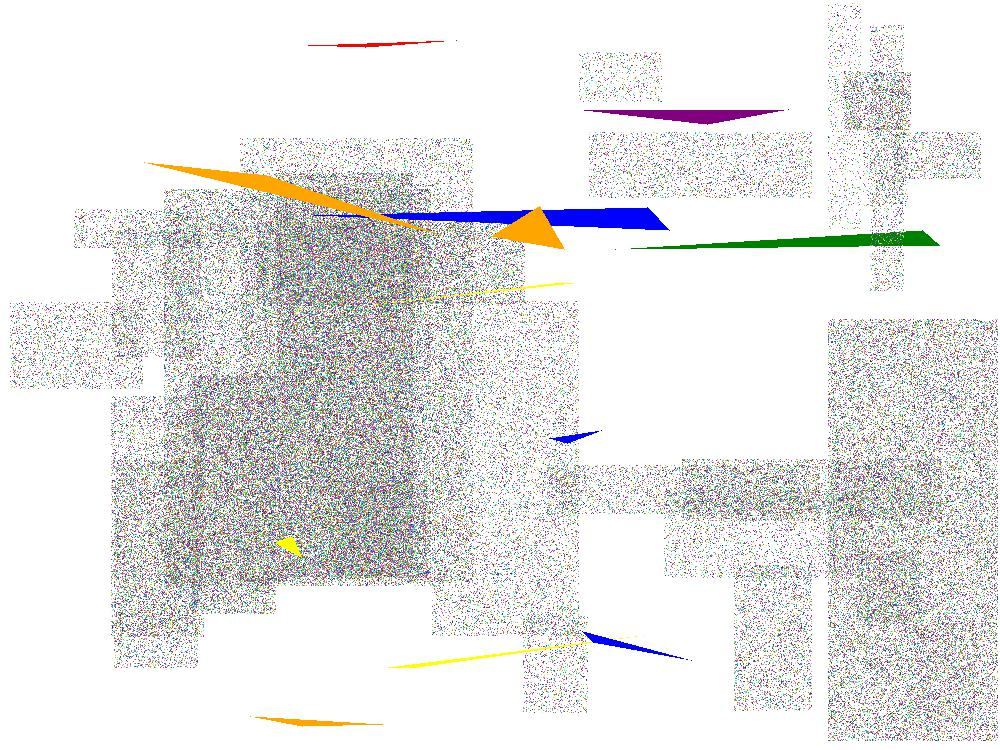

In [33]:
from IPython.display import Image
# Image('/content/drive/MyDrive/Moire/unnormalized/negative/018/28.jpeg')
Image('/content/drive/MyDrive/Moire/unnormalized/negative/020/29.jpeg')

## Extended Training
Take the trained model and continue training with additional data

In [59]:
# normalizeRawImages("001", "001")
# augmentNormalizedData("001", "001")
# normalizeRawImages("001", "002")
# augmentNormalizedData("001", "002")
# normalizeRawImages("001", "003")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       001", "003")
# augmentNormalizedData("001", "003")
# normalizeRawImages("001", "004")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       001", "003")
# augmentNormalizedData("001", "004")
# normalizeRawImages("001", "005")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       001", "003")
# augmentNormalizedData("001", "005")
# normalizeRawImages("001", "006")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       001", "003")
# augmentNormalizedData("001", "006")

# weights_file = '/content/drive/MyDrive/Moire/checkPoint/final-tm1626925731-sp001-ds020_013-weights'
weights_file = None

superpoch_count = 3
epochs = 20
datasets = ['018', '018']

for sp in range(superpoch_count):
  superpoch = '00' + str(sp + 1)
  print('---------------------------------------------------------')
  print('BEGINNING TRAINING OF SUPERPOCH: ' + superpoch)
  print('---------------------------------------------------------')
  for ds in range(len(datasets)):
    dsIndex = ds
    otherDsIndex = ((ds + 1) % len(datasets))
    # datasets = ['00' + str(dsNumber), '00' + str(otherDsNumber)]
    print([datasets[dsIndex], datasets[otherDsIndex]])

    # print(ds)
    # print(i)

    # print(datasets)
    # normalizeRawImages(superpoch, dataset)
    # augmentNormalizedData(superpoch, dataset)

    weights_file = trainMoire(superpoch, [datasets[dsIndex], datasets[otherDsIndex]], epochs, weights_file)
    testMoire(weights_file, superpoch, [datasets[dsIndex], datasets[otherDsIndex]])
    print('---------------------------------------------------------')

# testMoire(weights_file, '001', ['004', '005'])
# /content/drive/MyDrive/Moire/preaugmented/positive/001/IMG_2866.HEIC
# /content/drive/MyDrive/Moire/preaugmented/positive/001/IMG_2875.HEIC
# /content/drive/MyDrive/Moire/preaugmented/positive/001/IMG_2893.HEIC
# /content/drive/MyDrive/Moire/preaugmented/positive/002/IMG_2900.HEIC
# /content/drive/MyDrive/Moire/preaugmented/positive/002/IMG_2904.HEIC
# /content/drive/MyDrive/Moire/preaugmented/positive/002/IMG_2915.HEIC
# /content/drive/MyDrive/Moire/preaugmented/positive/002/IMG_2921.HEIC
# /content/drive/MyDrive/Moire/preaugmented/positive/002/IMG_2929.HEIC



---------------------------------------------------------
BEGINNING TRAINING OF SUPERPOCH: 001
---------------------------------------------------------
['018', '018']
##### TRAINING - superpoch: 001 - dataset: 018,  018
/content/drive/MyDrive/Moire/train/positive/018/
/content/drive/MyDrive/Moire/train/negative/018/
positive samples: 288
negative samples: 288
positive data loaded.
negative data loaded.
Total Samples Loaded:  864
Dataset length: 576
num_train_samples 576
/content/drive/MyDrive/Moire/train/positive/018/
/content/drive/MyDrive/Moire/train/negative/018/
positive samples: 288
negative samples: 288
positive data loaded.
negative data loaded.
Total Samples Loaded:  864
Dataset length: 576
num_train_samples 576
Concatenating 2 datasets.
(576, 375, 500, 1)
(576, 375, 500, 1)
SHAPE
(1152, 375, 500, 1)
--- No weights file provided.  Compiling a new one.
KerasTensor(type_spec=TensorSpec(shape=(None, 187, 250, 32), dtype=tf.float32, name=None), name='multiply/mul:0', description="

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
33/33 [==============================] - 7s 215ms/step - loss: 0.5939 - accuracy: 0.6197 - val_loss: 0.5634 - val_accuracy: 0.6810

Epoch 00002: val_loss improved from 0.60765 to 0.56343, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep002-ls0.56343-ac0.68-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep002-ls0.56343-ac0.68-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/20
33/33 [==============================] - 7s 216ms/step - loss: 0.5528 - accuracy: 0.6335 - val_loss: 0.5449 - val_accuracy: 0.6897

Epoch 00003: val_loss improved from 0.56343 to 0.54492, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep003-ls0.54492-ac0.69-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep003-ls0.54492-ac0.69-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/20
33/33 [==============================] - 7s 216ms/step - loss: 0.5661 - accuracy: 0.6718 - val_loss: 0.5350 - val_accuracy: 0.8362

Epoch 00004: val_loss improved from 0.54492 to 0.53501, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep004-ls0.53501-ac0.84-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep004-ls0.53501-ac0.84-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/20
33/33 [==============================] - 7s 216ms/step - loss: 0.5027 - accuracy: 0.7030 - val_loss: 0.4958 - val_accuracy: 0.7759

Epoch 00005: val_loss improved from 0.53501 to 0.49582, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep005-ls0.49582-ac0.78-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep005-ls0.49582-ac0.78-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/20
33/33 [==============================] - 7s 214ms/step - loss: 0.4758 - accuracy: 0.7256 - val_loss: 0.4032 - val_accuracy: 0.8621

Epoch 00006: val_loss improved from 0.49582 to 0.40324, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep006-ls0.40324-ac0.86-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep006-ls0.40324-ac0.86-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/20
33/33 [==============================] - 7s 215ms/step - loss: 0.4260 - accuracy: 0.7482 - val_loss: 0.4173 - val_accuracy: 0.8276

Epoch 00007: val_loss did not improve from 0.40324
Epoch 8/20
33/33 [==============================] - 7s 216ms/step - loss: 0.3773 - accuracy: 0.7582 - val_loss: 0.2782 - val_accuracy: 0.9224

Epoch 00008: val_loss improved from 0.40324 to 0.27821, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep008-ls0.27821-ac0.92-weights


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep008-ls0.27821-ac0.92-weights/assets
Epoch 9/20
33/33 [==============================] - 7s 215ms/step - loss: 0.3509 - accuracy: 0.7842 - val_loss: 0.2533 - val_accuracy: 0.8707

Epoch 00009: val_loss improved from 0.27821 to 0.25329, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep009-ls0.25329-ac0.87-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep009-ls0.25329-ac0.87-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/20
33/33 [==============================] - 7s 216ms/step - loss: 0.3068 - accuracy: 0.8491 - val_loss: 0.1221 - val_accuracy: 0.9828

Epoch 00010: val_loss improved from 0.25329 to 0.12212, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep010-ls0.12212-ac0.98-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep010-ls0.12212-ac0.98-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 11/20
33/33 [==============================] - 7s 217ms/step - loss: 0.2297 - accuracy: 0.9362 - val_loss: 0.1259 - val_accuracy: 0.9914

Epoch 00011: val_loss did not improve from 0.12212
Epoch 12/20
33/33 [==============================] - 7s 216ms/step - loss: 0.2454 - accuracy: 0.9414 - val_loss: 0.1060 - val_accuracy: 0.9828

Epoch 00012: val_loss improved from 0.12212 to 0.10602, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep012-ls0.10602-ac0.98-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep012-ls0.10602-ac0.98-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 13/20
33/33 [==============================] - 7s 215ms/step - loss: 0.1878 - accuracy: 0.9564 - val_loss: 0.0996 - val_accuracy: 0.9569

Epoch 00013: val_loss improved from 0.10602 to 0.09958, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep013-ls0.09958-ac0.96-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep013-ls0.09958-ac0.96-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 14/20
33/33 [==============================] - 7s 215ms/step - loss: 0.1487 - accuracy: 0.9746 - val_loss: 0.0344 - val_accuracy: 1.0000

Epoch 00014: val_loss improved from 0.09958 to 0.03435, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep014-ls0.03435-ac1.00-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep014-ls0.03435-ac1.00-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 15/20
33/33 [==============================] - 7s 216ms/step - loss: 0.1526 - accuracy: 0.9728 - val_loss: 0.0386 - val_accuracy: 1.0000

Epoch 00015: val_loss did not improve from 0.03435
Epoch 16/20
33/33 [==============================] - 7s 215ms/step - loss: 0.1160 - accuracy: 0.9752 - val_loss: 0.0246 - val_accuracy: 0.9914

Epoch 00016: val_loss improved from 0.03435 to 0.02465, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep016-ls0.02465-ac0.99-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep016-ls0.02465-ac0.99-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 17/20
33/33 [==============================] - 7s 215ms/step - loss: 0.1045 - accuracy: 0.9913 - val_loss: 0.0222 - val_accuracy: 1.0000

Epoch 00017: val_loss improved from 0.02465 to 0.02219, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep017-ls0.02219-ac1.00-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep017-ls0.02219-ac1.00-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 18/20
33/33 [==============================] - 7s 214ms/step - loss: 0.1041 - accuracy: 0.9869 - val_loss: 0.0255 - val_accuracy: 1.0000

Epoch 00018: val_loss did not improve from 0.02219
Epoch 19/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0814 - accuracy: 0.9832 - val_loss: 0.0029 - val_accuracy: 1.0000

Epoch 00019: val_loss improved from 0.02219 to 0.00287, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep019-ls0.00287-ac1.00-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep019-ls0.00287-ac1.00-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 20/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.0117 - val_accuracy: 1.0000

Epoch 00020: val_loss did not improve from 0.00287
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/final-tm1627005414-sp001-ds018_018-weights/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


##### TESTING - superpoch: 001 - dataset: 018, 018
/content/drive/MyDrive/Moire/test/positive/018/
/content/drive/MyDrive/Moire/test/negative/018/
positive samples: 72
negative samples: 72
positive data loaded.
negative data loaded.
Total Samples Loaded:  216
Dataset length: 144
num_train_samples 144
/content/drive/MyDrive/Moire/test/positive/018/
/content/drive/MyDrive/Moire/test/negative/018/
positive samples: 72
negative samples: 72
positive data loaded.
negative data loaded.
Total Samples Loaded:  216
Dataset length: 144
num_train_samples 144
Concatenating 2 datasets.
incorrect positives with threshold: 10
largest false positive confidence: 0.28620782
smalles true positive confidence: 0.81601703
confusion matrix (test / validation)
true positive:  136
false positive: 10
true negative:  134
false negative: 8


accuracy:  93.7500 %
precision: 93.1507 %
recall:  94.4444 %
---------------------------------------------------------
['018', '018']
##### TRAINING - superpoch: 001 - dataset

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
33/33 [==============================] - 7s 214ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0036 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.00969 to 0.00357, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep002-ls0.00357-ac1.00-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep002-ls0.00357-ac1.00-weights/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/20
33/33 [==============================] - 7s 214ms/step - loss: 0.0296 - accuracy: 0.9894 - val_loss: 0.0041 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 0.00357
Epoch 4/20
33/33 [==============================] - 7s 216ms/step - loss: 0.0192 - accuracy: 0.9923 - val_loss: 0.0072 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00357
Epoch 5/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0092 - val_accuracy: 1.0000

Epoch 00005: val_loss did not improve from 0.00357
Epoch 6/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0533 - accuracy: 0.9855 - val_loss: 0.0066 - val_accuracy: 0.9914

Epoch 00006: val_loss did not improve from 0.00357
Epoch 7/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0249 - accuracy: 0.9932 - val_loss: 0.0025 - val_accuracy: 1.0000

Epoch 00007: val_loss improved from 0.00357 to 0.00252, saving model to /content/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0312 - accuracy: 0.9932 - val_loss: 0.0552 - val_accuracy: 0.9741

Epoch 00008: val_loss did not improve from 0.00252
Epoch 9/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0252 - accuracy: 0.9932 - val_loss: 0.0018 - val_accuracy: 1.0000

Epoch 00009: val_loss improved from 0.00252 to 0.00179, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep009-ls0.00179-ac1.00-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep009-ls0.00179-ac1.00-weights/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/20
33/33 [==============================] - 7s 213ms/step - loss: 0.0302 - accuracy: 0.9894 - val_loss: 0.0054 - val_accuracy: 1.0000

Epoch 00010: val_loss did not improve from 0.00179
Epoch 11/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0314 - accuracy: 0.9913 - val_loss: 0.0021 - val_accuracy: 1.0000

Epoch 00011: val_loss did not improve from 0.00179
Epoch 12/20
33/33 [==============================] - 7s 214ms/step - loss: 0.0489 - accuracy: 0.9817 - val_loss: 0.0374 - val_accuracy: 0.9914

Epoch 00012: val_loss did not improve from 0.00179
Epoch 13/20
33/33 [==============================] - 7s 215ms/step - loss: 0.1529 - accuracy: 0.9508 - val_loss: 0.0373 - val_accuracy: 1.0000

Epoch 00013: val_loss did not improve from 0.00179
Epoch 14/20
33/33 [==============================] - 7s 216ms/step - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.0045 - val_accuracy: 1.0000

Epoch 00014: val_loss did not improve from 0.00179
Epoch 15/20
33/33 [======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 17/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0171 - accuracy: 0.9913 - val_loss: 0.0024 - val_accuracy: 1.0000

Epoch 00017: val_loss did not improve from 0.00138
Epoch 18/20
33/33 [==============================] - 7s 214ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0085 - val_accuracy: 1.0000

Epoch 00018: val_loss did not improve from 0.00138
Epoch 19/20
33/33 [==============================] - 7s 214ms/step - loss: 0.0092 - accuracy: 0.9961 - val_loss: 0.0019 - val_accuracy: 1.0000

Epoch 00019: val_loss did not improve from 0.00138
Epoch 20/20
33/33 [==============================] - 7s 215ms/step - loss: 0.0068 - accuracy: 0.9971 - val_loss: 1.1716e-04 - val_accuracy: 1.0000

Epoch 00020: val_loss improved from 0.00138 to 0.00012, saving model to /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep020-ls0.00012-ac1.00-weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/mid-sp001-ds018_018-ep020-ls0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Moire/checkPoint/final-tm1627005608-sp001-ds018_018-weights/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


##### TESTING - superpoch: 001 - dataset: 018, 018
/content/drive/MyDrive/Moire/test/positive/018/
/content/drive/MyDrive/Moire/test/negative/018/
positive samples: 72
negative samples: 72
positive data loaded.
negative data loaded.
Total Samples Loaded:  216
Dataset length: 144
num_train_samples 144
/content/drive/MyDrive/Moire/test/positive/018/
/content/drive/MyDrive/Moire/test/negative/018/
positive samples: 72
negative samples: 72
positive data loaded.
negative data loaded.
Total Samples Loaded:  216
Dataset length: 144
num_train_samples 144
Concatenating 2 datasets.
incorrect positives with threshold: 4
largest false positive confidence: 0.32684126
smalles true positive confidence: 0.95370144
confusion matrix (test / validation)
true positive:  140
false positive: 4
true negative:  140
false negative: 4


accuracy:  97.2222 %
precision: 97.2222 %
recall:  97.2222 %
---------------------------------------------------------
---------------------------------------------------------


KeyboardInterrupt: ignored

In [ ]:
# X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train = mainReadDatafromDrive('/content/drive/MyDrive/Moire/trainDataPositive', '/content/drive/MyDrive/Moire/trainDataNegative')
# !ls /content/drive/MyDrive/Moire/preaugmented/positive/003
print('negative unnormalized 001: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/unnormalized/negative/001')])))
print('positive unnormalized 001: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/unnormalized/positive/001')])))
print('negative unnormalized 002: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/unnormalized/negative/002')])))
print('positive unnormalized 002: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/unnormalized/positive/002')])))
print('negative unnormalized 003: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/unnormalized/negative/003')])))
print('positive unnormalized 003: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/unnormalized/positive/003')])))
# print('negative train 001: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/train/negative/001')])))
# print('negative train 002: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/train/negative/002')])))
# print('negative train 003: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/train/negative/003')])))
# print('positive train 001: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/train/positive/001')])))
# print('positive train 002: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/train/positive/002')])))
# print('positive train 003: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/train/positive/003')])))
# print('negative test 001: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/test/negative/001')])))
# print('negative test 002: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/test/negative/002')])))
# print('negative test 003: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/test/negative/003')])))
# print('positive test 001: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/test/positive/001')])))
# print('positive test 002: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/test/positive/002')])))
# print('positive test 003: ' + str(len([name for name in os.listdir('/content/drive/MyDrive/Moire/test/positive/003')])))


In [ ]:
# testMoire('/content/drive/MyDrive/Moire/checkPoint/mid-sp005-ds002-ep016-ls0.00455-ac1.00-weights.h5', "001", "001")

In [ ]:
def intermediateMoire(dataSetNumber, weights_file = None):

    X_LL, X_LH, X_HL, X_HH, Y = mainReadDatafromDrive(dataSetNumber, 'test')
    return createIntermediateModel(dataSetNumber, X_LL, X_LH, X_HL, X_HH, Y, weights_file)
    

def createIntermediateModel(dataSetNumber, X_LL_train, X_LH_train, X_HL_train, X_HH_train, y_train, weights_file):

    batch_size = 32 # in each iteration, we consider 32 training examples at once
    print("SHAPE")
    print(X_LL_train.shape);
    num_train, height, width, depth = X_LL_train.shape
    num_classes = len(np.unique(y_train))
    Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
    # Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels
    
    # if not os.path.exists(checkPointFolder):
    #     os.makedirs(checkPointFolder)
        
        
    model, intermediate_model = createModel(height, width, depth, num_classes)

    if weights_file != None:
      print('--- Loading weights file: ' + weights_file)
      model.load_weights(weights_file)
    else:
      print('--- No weights file provided.  Creating new model.')
    
    model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
                  optimizer='adam', # using the Adam optimiser
                  metrics=['accuracy']) # reporting the accuracy

    model.summary()

    # weights_list = model.get_weights()
    # for i in range(len(model.layers)):
    #   print(model.layers[i].get_weights())
      # print(model.layers[i].get_weights()[1])
    
    model_index = 0;
    print('----------------')
    for layer in intermediate_model.layers:
      for weights in layer.get_weights():
        weights = model.get_weights()[model_index]
        model_index = model_index + 1

    # print('----------------')

    # for layer in model.layers:
    #   for weights in layer.get_weights():
    #     print(len(weights))
    # print('----------------')
    
    # intermediate_model.layers[5].set_weights(weights_list[0])
    # print(len(model.layers))
    # intermediate_model.layers[i].set_weights(weights)

    # intermediate_model.summary()

    # model.fit([X_LL_train,X_LH_train,X_HL_train,X_HH_train], Y_train,                # Train the model using the training set...
    #           batch_size=batch_size, epochs=num_epochs,
    #           verbose=1, validation_split=0.1, callbacks=callbacks_list) # ...holding out 10% of the data for validation
    # score, acc = model.evaluate([X_LL_test,X_LH_test,X_HL_test,X_HH_test], Y_test, verbose=1)  # Evaluate the trained model on the test set!

    # modelName = '/content/drive/MyDrive/Moire/checkPoint/final-tm' + str(time.time()).split('.')[0] + '-sp' + superpoch + '-ds' + dataSetNumber + '-weights.h5'
    # model.save(modelName)
    
    return intermediate_model

In [ ]:
# from keras.models import Model

# model = intermediateMoire("001", '/content/drive/MyDrive/Moire/checkPoint/mid-sp005-ds002-ep016-ls0.00455-ac1.00-weights.h5')

# model.summary()
# X_LL, X_LH, X_HL, X_HH, Y = mainReadDatafromDrive("001", 'test')
# model_out = model.predict([X_LL, X_LH, X_HL, X_HH])


# print(model_out.shape)

In [ ]:
# from PIL import Image
# import numpy as np
# model_shape = model_out.shape

# reshaped_output = np.reshape(model_out, (model_shape[0], model_shape[3], model_shape[1], model_shape[2]))

# print(reshaped_output.shape)
# index = 0
# # for image_batch in reshaped_output:
# for image in reshaped_output[0]:
#   # image_batch = np.reshape(reshaped_output, (model_shape[0], model_shape[3], model_shape[1], model_shape[2]))
#   print(image.shape)

#   largest = 0
#   smallest = 100000

#   for row in image:
#     for i in row:
#       if i > largest:
#         largest = i
#       if i < smallest:
#         smallest = i

#   value_range = largest - smallest
#   scale_value = 255 / value_range

#   for i in range(len(image)):
#     for j in range(len(image[i])):
#       image[i][j] = scale_value * image[i][j]
#   print('largest: ' + str(largest))
#   print('smallest: ' + str(smallest))
#   im = Image.fromarray(image)
#   index = index + 1

#   if im.mode != 'RGB':
#     im = im.convert('RGB')

#   im.save('/content/drive/MyDrive/Moire/intermediate/test/negative/001/' + str(index) + ".jpg")

# print(index)
# print(np.reshape(model_out, (model_shape[0], model_shape[3], model_shape[1], model_shape[2])).shape)

In [ ]:
# #constants
# # width = 500#384 #change dimensions according to the input image in the training
# # height = 375#512 #change dimensions according to the input image in the training
# # depth = 1
# # num_classes = 2

# def continueTraining(weightsFile, X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train, num_epochs):
#     weights_file = (weightsFile)

#     # X_LL, X_LH, X_HL, X_HH, Y = mainReadDatafromDrive(positiveImagePath, negativeImagePath)
    
    

#     batch_size = 32 # in each iteration, we consider 32 training examples at once
#     print("SHAPE")
#     print(X_LL_train.shape);
#     num_train, height, width, depth = X_LL_train.shape
#     num_classes = len(np.unique(Y_train))
#     Y_train = np_utils.to_categorical(Y_train, num_classes) # One-hot encode the labels
#     print(Y_train);
#     # Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

#     CNN_model = createModel(height, width, depth, num_classes)
#     CNN_model.load_weights(weights_file)

#     checkPointFolder = 'content/drive/MyDrive/Moire/checkPoint'
#     checkpoint_name = checkPointFolder + '/Weights-retrained-002--{epoch:03d}--{val_loss:.5f}.hdf5' 
#     checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
#     callbacks_list = [checkpoint]
    
#     if not os.path.exists(checkPointFolder):
#         os.makedirs(checkPointFolder)
        
        
#     # model = createModel(height, width, depth, num_classes)
    
#     CNN_model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
#                   optimizer='adam', # using the Adam optimiser
#                   metrics=['accuracy']) # reporting the accuracy

#     CNN_model.fit([X_LL_train,X_LH_train,X_HL_train,X_HH_train], Y_train,                # Train the model using the training set...
#               batch_size=batch_size, epochs=num_epochs,
#               verbose=1, validation_split=0.1, callbacks=callbacks_list) # ...holding out 10% of the data for validation
#     # score, acc = model.evaluate([X_LL_test,X_LH_test,X_HL_test,X_HH_test], Y_test, verbose=1)  # Evaluate the trained model on the test set!

#     CNN_model.save('content/drive/MyDrive/Moire/checkPoint/retrained-002-moirePattern3CNN_.h5')
    
#     return model
#     # evaluate(CNN_model,X_LL,X_LH,X_HL,X_HH, Y)
# import time
# str(time.time()).split('.')[0]

In [ ]:
# continueTraining('content/drive/MyDrive/Moire/checkPoint/Weights-028--0.06866.hdf5', X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train, 1)

In [ ]:
# !ls content/drive/MyDrive/Moire/checkPoint

In [ ]:
# mainTest('content/drive/MyDrive/Moire/checkPoint/retrained-002-moirePattern3CNN_.h5', '/content/drive/MyDrive/Moire/testDataPositive', '/content/drive/MyDrive/Moire/testDataNegative')
